In [1]:
from matplotlib import pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.exceptions import ConvergenceWarning

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [7]:
general_path = 'C:\\20+\\araproje\\features_6_sec'
#data = pd.read_csv(f'{general_path}\\features_no_cluster.csv')
data = pd.read_csv(f'C:\\Users\\tarik\\PycharmProjects\\pythonProject2\\deneme_2.csv')

data.head()

pandas.core.frame.DataFrame

In [3]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
#### NORMALIZE X ####

# Normalize so everything is on the same scale.

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [4]:
models = [("Logistic Regression", LogisticRegression()),
          ("Random Forest", RandomForestClassifier()),
          ("K Neighbors", KNeighborsClassifier()),
          ("Support Vector",SVC()),
          ("Gaussian Naive Bayes",GaussianNB()),
          ("XGBoost", XGBClassifier()),
          ("Stochastic Gradient Descent ", SGDClassifier(max_iter=5000, random_state=0)),
          ("Decision Tree", DecisionTreeClassifier()),
          ("XGBoost Random Forest", XGBRFClassifier(objective= 'multi:softmax')),
          ("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')),
          ("Gradient Boosting", GradientBoostingClassifier()),
          ("Ada Boost", AdaBoostClassifier()),
          ("Linear Support Vector", LinearSVC(penalty='l1', dual=False, multi_class='crammer_singer', max_iter=1000000))]



table = []
scoring = ["accuracy", "recall_macro", "precision_macro", "f1_macro"]
cv = KFold(n_splits=5,shuffle=True)

def get_avgs(score_dict):
    returnList = []
    del score_dict['fit_time']
    del score_dict['score_time']
    for metric_name in score_dict.keys():
        returnList.append(np.average(score_dict[metric_name]))
    return returnList

headers = ["Name","Avg. Accuracy", "Avg. Recall", "Avg. Precision", "Avg. f1"]
print(tabulate(table, headers = headers))


Name    Avg. Accuracy    Avg. Recall    Avg. Precision    Avg. f1
------  ---------------  -------------  ----------------  ---------


Accuracy : 0.0 



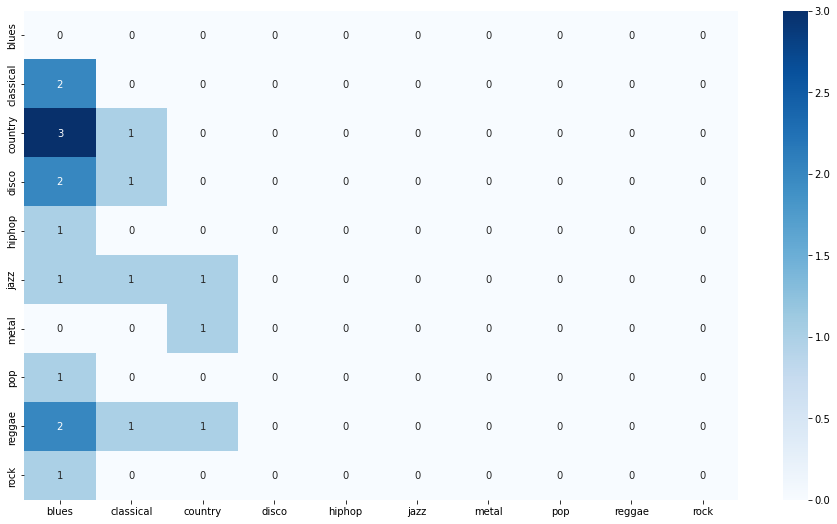

In [5]:
target_names = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
def print_conf_matrix(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

    # Confusion Matrix
    confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
    plt.figure(figsize = (16, 9))
    sns.heatmap(confusion_matr, cmap="Blues", annot=True, fmt='d',
                xticklabels=target_names, yticklabels=target_names)
    plt.show()

print_conf_matrix(KNeighborsClassifier(),X_train,X_test,y_train,y_test)

